<a href="https://colab.research.google.com/github/bldev2473/AudioProcessingWithPython/blob/main/AudioProcessingWithPython_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import wave
import numpy as np
import requests

r = requests.get('http://www.aoakley.com/articles/stereo-test.mp3')

with open('stereo-test.mp3', mode='bx') as f:
    f.write(r.content)

In [ ]:
pip install pydub

In [ ]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3('stereo-test.mp3')
sound.export('stereo-test.wav', format="wav")

<_io.BufferedRandom name='stereo-test.wav'>

In [ ]:
file = wave.open('stereo-test.wav')

In [ ]:
fr = file.getframerate()
print(fr)

32000


In [ ]:
nframes = file.getnframes()
print(nframes)

535781


In [ ]:
nchannels = file.getnchannels()
print(nchannels)

2


In [ ]:
data = file.readframes(100000)
print(data)
nframes = 100000

b'/\x00\xff\xff\xc8\x00\x01\x00\xae\xff\xff\xff\xaa\xff\x00\x00l\x00\x00\x006\x00\x00\x00~\xff\x00\x00\xaa\xff\x00\x00\xa0\xff\x00\x00\xe8\xfe\x00\x00\xfd\xfe\x00\x00\xf2\xfe\x00\x00U\xff\xff\xff\xf4\xfe\x00\x00M\xff\x00\x00o\x00\x00\x00\x05\x01\xff\xffx\x00\x00\x00\xed\xff\x01\x00\xfa\xff\x00\x00\x12\x00\x00\x00S\x00\x00\x00X\x00\x00\x00\x12\x01\x00\x00\xb9\x00\x00\x00E\x00\x00\x00\xb1\xff\x00\x00\x82\xff\x00\x00b\xff\x00\x005\xff\x00\x00P\xff\x00\x005\xff\x00\x00\xca\xff\x00\x00\xb0\xff\x00\x00\xca\xff\x00\x00\x86\xff\x00\x00`\xff\x00\x00\xcc\xff\x00\x00+\x00\x01\x00<\x00\x00\x00\x9f\xff\x00\x00g\xff\x01\x00\x12\x00\x00\x007\x00\x00\x00\x90\xff\x00\x00.\xff\x00\x00B\xff\x00\x00\xd6\xff\x00\x00\xb8\xff\x00\x00\xc6\xff\x00\x00\x0c\x01\x00\x00+\x01\x00\x00l\xff\x00\x00\xde\xff\xff\xfff\x00\x00\x00!\x00\x00\x00\xdb\x00\xff\xffR\x00\x00\x00\x99\xff\x00\x00\x82\xff\x00\x00r\x00\x00\x00\xa7\x00\x00\x00\x91\x00\x00\x00\xc7\x00\x00\x00{\x00\x00\x00\xc6\xff\xff\xff\x07\xff\x00\x00\xe7\xff\x00\

In [ ]:
w_data = np.frombuffer(data, np.int16)
print(w_data)

[  47   -1  200 ... 1500    0 1926]


In [ ]:
w_data.shape = -1, 2
print(w_data)

[[  47   -1]
 [ 200    1]
 [ -82   -1]
 ...
 [   0  903]
 [   0 1500]
 [   0 1926]]


In [ ]:
w_data = w_data.T
print(w_data)

[[  47  200  -82 ...    0    0    0]
 [  -1    1   -1 ...  903 1500 1926]]


In [ ]:
print(len(w_data[0]), len(w_data[1]))

100000 100000


In [ ]:
print(nframes/fr)
duration = 1/fr
print(duration)

3.125
3.125e-05


In [ ]:
time_sequence = np.arange(0, nframes/fr, duration)
print(time_sequence)

[0.00000000e+00 3.12500000e-05 6.25000000e-05 ... 3.12490625e+00
 3.12493750e+00 3.12496875e+00]


In [ ]:
import matplotlib.pyplot as plt

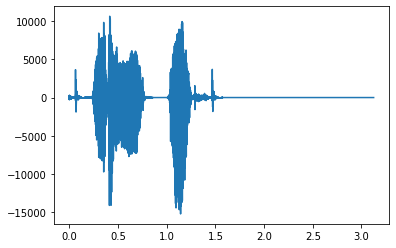

In [ ]:
plt.plot(time_sequence, w_data[0])
plt.show()

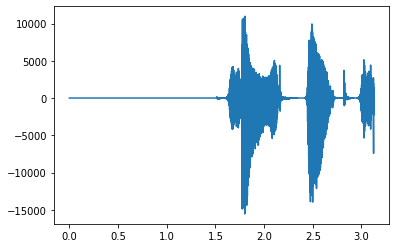

In [ ]:
plt.plot(time_sequence, w_data[1])
plt.show()